### Trustworthy Recommender System Policy

Calculate policy:
pt(t,s=0)
 - We don't have to check for pt(t,s=1) since pt(t,s=1) = 1 for all t.

At t = 0
First recieve signal 
 - s = 1 with probability p0 if w = 1
 - s = 0 with probability 1-p0 if w = 1
 - s = 1 with probability 0 if w = 0
 - s = 0 with probability 1 if w = 0

Case where we recieve good news
If s = 1, set pt,alphat = 1 and any pull stochastic arm

Case where we recieve no news
If s = 0, check for pt(t+1,s=0) in the table and calculate alphat+1 and pt+1*

At t = 1
First check if s = 1
Otherwise
determine if pt < pt*
then set pt,alphat = 0 and only pull stochastic arm
else
continue

In [2]:
import numpy as np

In [5]:
np.zeros(10+1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
def first_best_policy(p0,rho,c,n,r=0,lamb=0):
    """
    Policy for trustworthy recommender system implemented by
    Bayesian Optimal Policy (BOP)

    Args:
        p0: Prior for recieving good news (constant)
        rho: Background learning (constant)
        lamb: rate at which user consumption produces breakthrough news
        c: cost of consuming product
        r: ? 
        n: Horizon
    """ 
    qi = np.zeros(n+1)
    gi = np.zeros(n+1)
    wi = np.zeros([2,n+1])
    pi = np.zeros(n+1)
    alphai = np.ones(n+1)
    pi[0] = ((1-rho)*p0 )/ ((1-rho)*p0 + 1 - p0)
    for i in range(1,n+1):
        pi[i] = (pi[i-1]*(1-rho*alphai[i-1])) / (pi[i-1]*(1-rho*alphai[i-1])+(1-pi[i-1]))
    
    for i in range(n+1):
        gi[i] = (p0 - pi[i])/(1-pi[i])
        qi[i] = (gi[i] + (1-gi[i])*alphai[i]*pi[i]) / ((gi[i]) + (1-gi[i])*alphai[i])
        if qi[i] < c:
            alphai[i] = 0
        
    for i in range(n-1,-1,-1):
        wi[0][i] = (1-c)*(n-i+1)
        w = (1-c)*pi[i] + (-c)*(1-pi[i]) + rho*pi[i]*wi[0][i+1]-rho*pi[i]*wi[1][i+1]
        #print(qi)
        if w > 0:
            wi[1][i] = w*alphai[i] + wi[1][i+1]
        else:
            alphai[i] = 0
            wi[1][i] = wi[1][i+1]
    return pi,alphai,wi[1][:],qi

In [10]:
def second_best_policy(p0,rho,c,n):
    """
    Policy for trustworthy recommender system implemented by
    Bayesian Optimal Policy (BOP)

    Args:
        p0: Prior for recieving good news (constant)
        rho: Background learning (constant)
        lamb: rate at which user consumption produces breakthrough news
        c: cost of consuming product
        r: ? 
        n: Horizon
    """ 
    qi = np.zeros(n+1)
    gi = np.zeros(n+1)
    wi = np.zeros([2,n+1])
    pi = np.zeros(n+1)
    alphai = np.zeros(n+1)
    pi[0] = ((1-rho)*p0 )/ ((1-rho)*p0 + 1 - p0)
    for i in range(1,n+1):
        alphai[i-1] = ((1-c)*(p0-pi[i-1]))/((1-p0)*(c-pi[i-1]))
        pi[i] = (pi[i-1]*(1-rho*alphai[i-1])) / (pi[i-1]*(1-rho*alphai[i-1])+(1-pi[i-1]))
    
    for i in range(n+1):
        gi[i] = (p0 - pi[i])/(1-pi[i])
        qi[i] = (gi[i] + (1-gi[i])*alphai[i]*pi[i]) / ((gi[i]) + (1-gi[i])*alphai[i])
        
    for i in range(n-1,-1,-1):
        wi[0][i] = (1-c)*(n-i+1)
        w = (1-c)*pi[i] + (-c)*(1-pi[i]) + rho*pi[i]*wi[0][i+1]-rho*pi[i]*wi[1][i+1]
        #print(qi)
        if w > 0:
            wi[1][i] = w*alphai[i] + wi[1][i+1]
        else:
            wi[1][i] = wi[1][i+1]
    return pi,alphai,wi[1][:],qi

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
p1,alpha1,w1,q1 = first_best_policy(p0=0.5,rho=0.25,c=2/3,n=1000)
p2,alpha2,w2,q2 = second_best_policy(p0=0.5,rho=0.25,c=2/3,n=1000)

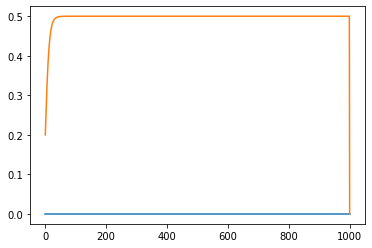

In [13]:
plt.plot(alpha1)
plt.plot(alpha2)